# Decision Trees

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets.

### Characteristics

- AKA **CART** (Classification and Regression Trees)
- The CART algorithm produces only *binary* (max 2 child nodes per parent) trees
- A **classification tree** is used to predict *categorical* outcomes
- A **regression tree** is used to predict *continuous* outcomes


Scikit-Learn uses the **CART** algorithm to train Decision Trees. The algorithm works by splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$. The algorithm searches for the pair $(k, t_k)$ that produces the "purest" subsets (weighted by their size).

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, stopping once it reaches the maximum depth (defined by the `max_depth` parameter), or if it cannot find a split that will *reduce* impurity.

This part handled by `sklearn.tree.DecisionTreeRegressor`, so it isn't necessary to understand the theory behind it. However, I was interested and that's why I've included it here.

#### Visual representation of a dataset and its Decision Tree split

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#### Example of a Decision Tree

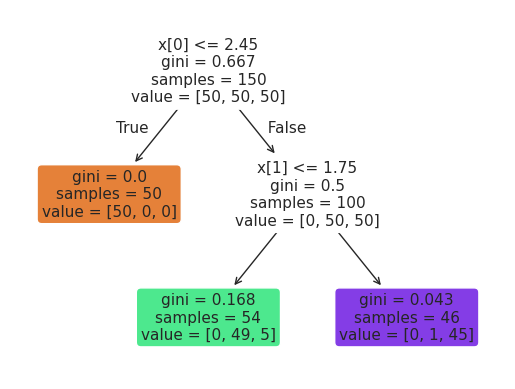

In [2]:
# adapted from https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)
plot_tree(tree_clf, filled=True, rounded=True, fontsize=11)
plt.show()

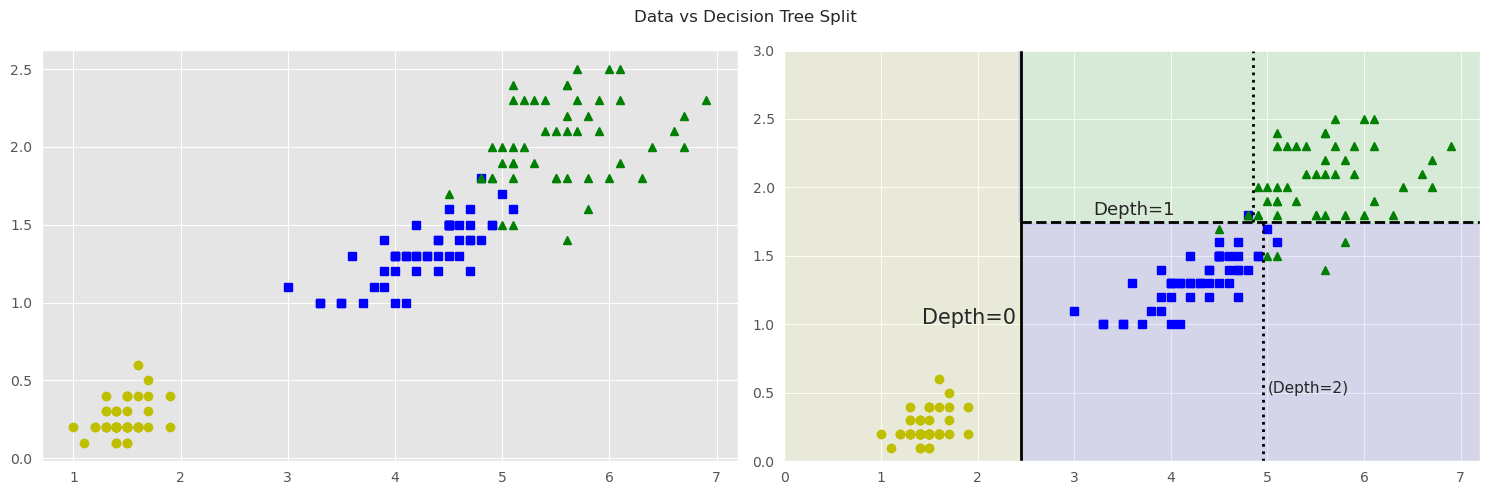

In [3]:
# adapted from https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.suptitle("Data vs Decision Tree Split")


lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

def style_loop():
    for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
        plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.subplot(121)
style_loop()

plt.subplot(122)

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

style_loop()
    
plt.contourf(
    lengths, 
    widths, 
    y_pred, 
    alpha=0.2, 
    cmap=custom_cmap
)

plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])

plt.tight_layout()
plt.show()

#### Gini Impurity

A node is "pure" ($gini = 0$) if *all* training instances it applies to belong to the same class.

Gini impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset.

Where:
- $G_i$ is the Gini impurity of the $i^{th}$ node
- $p_{i, k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node
- $n$ is the number of classes 

$$G_i = 1 - \sum_{k=1}^{n} p_{i, k}^2$$

#### Cost function for the CART training algorithm



Where
- $G$ is the impurity of the node
- $m$ is the number of instances in the node
- $m_{left}$ and $m_{right}$ are the number of instances in the left and right child nodes

$$J(k, t_k) = \frac{m_{left}}{m} G{left} + \frac{m_{right}}{m} G{right}$$

#### Entropy

By default, the `criterion` hyperparameter is set to `gini` in Scikit-Learn's DecisionTreeClassifier.

Entropy can be used as an alternative. Should it? Well, it depends on: entropy will tend to produce slightly more balanced trees, but gini impurity is faster to compute.

Anyway here's the formula for entropy.

Where:

Assuming $p_{i, k} \neq 0$

- $H_i$ is the entropy of the $i^{th}$ node
- $p_{i,k}\log_2(p_{i,k})$ is the contribution of a class $k$ to the entropy
- $- \sum_{k=1}^{n}$ the sum of the contributions of all possible classes

$$H_i = - \sum_{k=1}^{n} p_{i, k} \log_2(p_{i, k})$$





## Decision Tree Regression

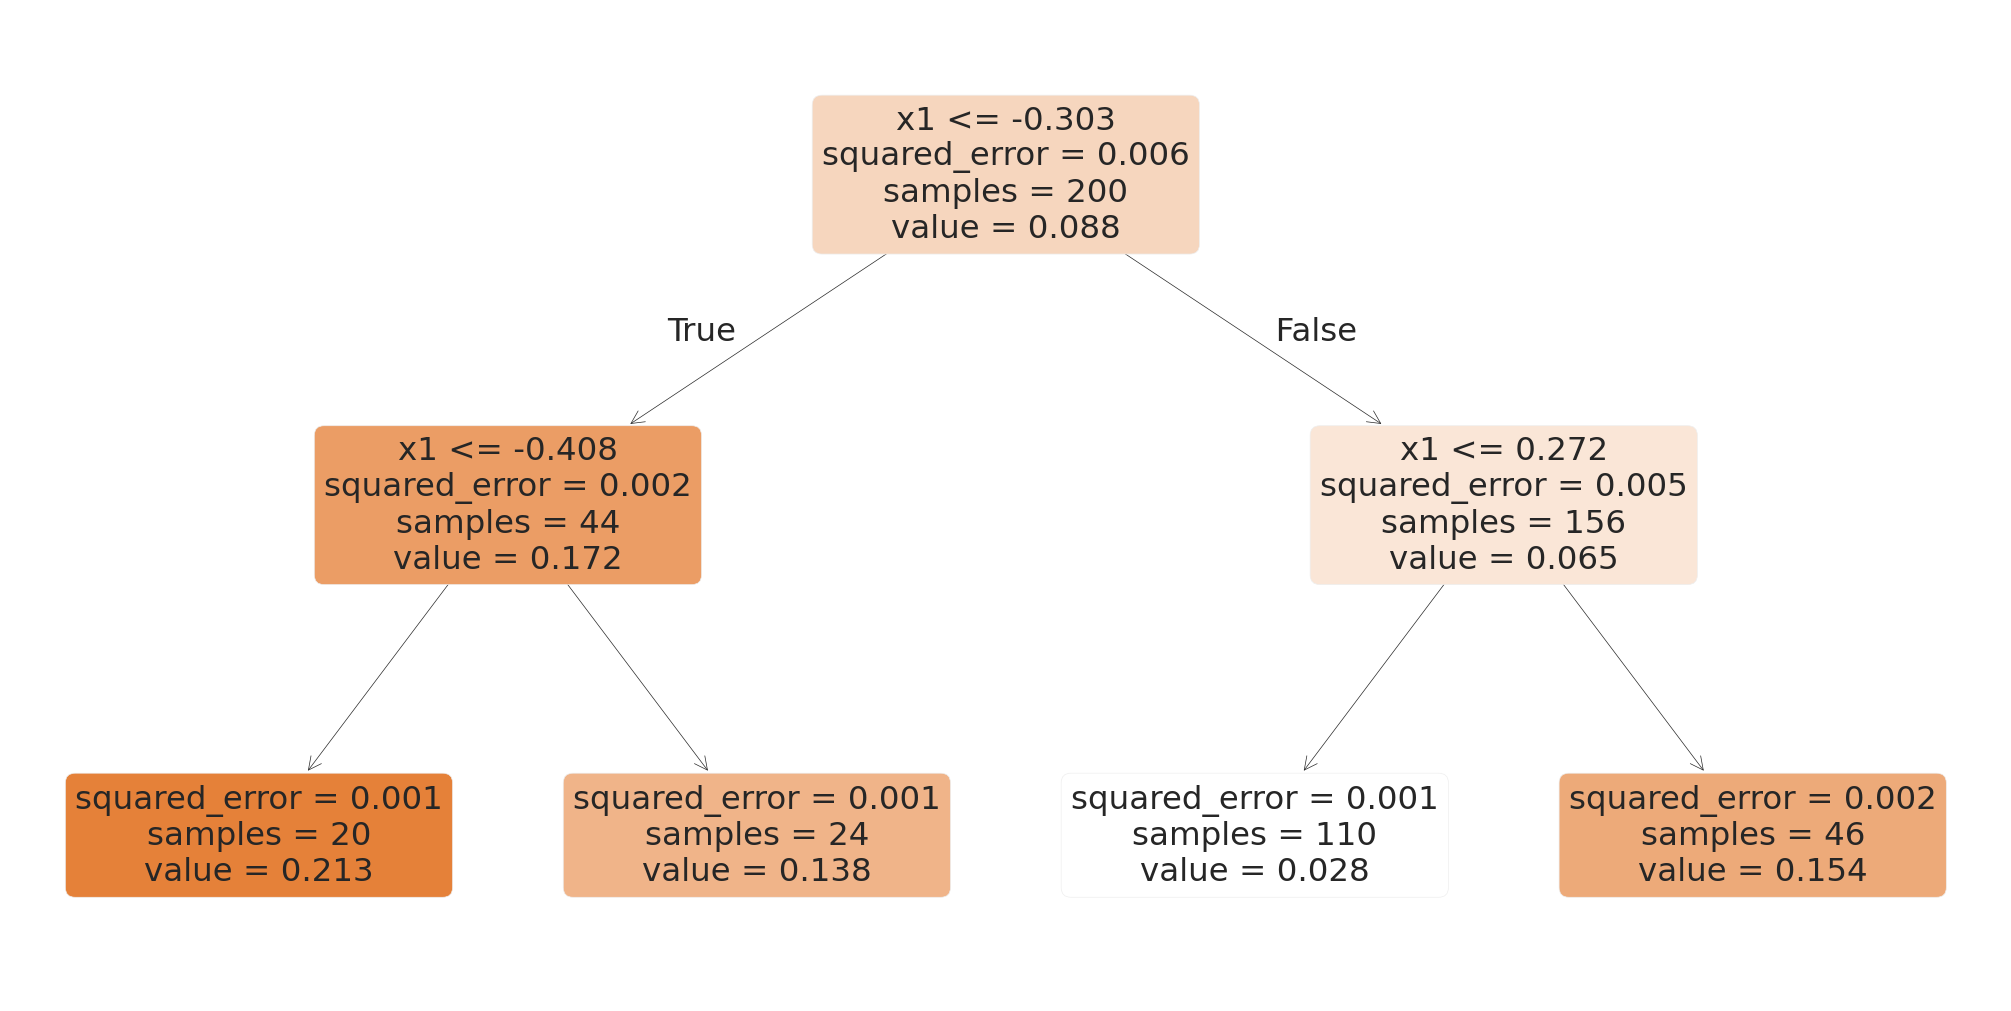

In [4]:
# https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

# export_graphviz(
#     tree_reg,
#     out_file=str("./img/regression_tree.dot"),
#     feature_names=["x1"],
#     rounded=True,
#     filled=True
# )
# Source.from_file("./img/regression_tree.dot")
plt.figure(figsize=(20, 10), layout="compressed")
plot_tree(tree_reg, filled=True, rounded=True, feature_names=["x1"])
plt.show()

### Examples of Decision Trees

#### Example 1 - Decision Trees

In [5]:
import pandas as pd

In [6]:
dataset = pd.read_csv("data/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [8]:
regressor.predict([[6.5]])

array([150000.])

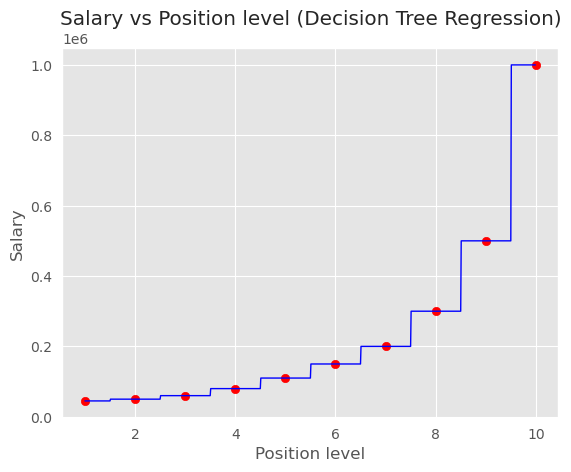

In [9]:
X_grid = np.arange(min(X)[0], max(X)[0], 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', linewidth = 1)
plt.title('Salary vs Position level (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Visualizing this decision tree has been a bit of a headache.

First, using `plot_tree` from `sklearn.tree` I had to adjust the `dpi` to 150 to make the text readable.

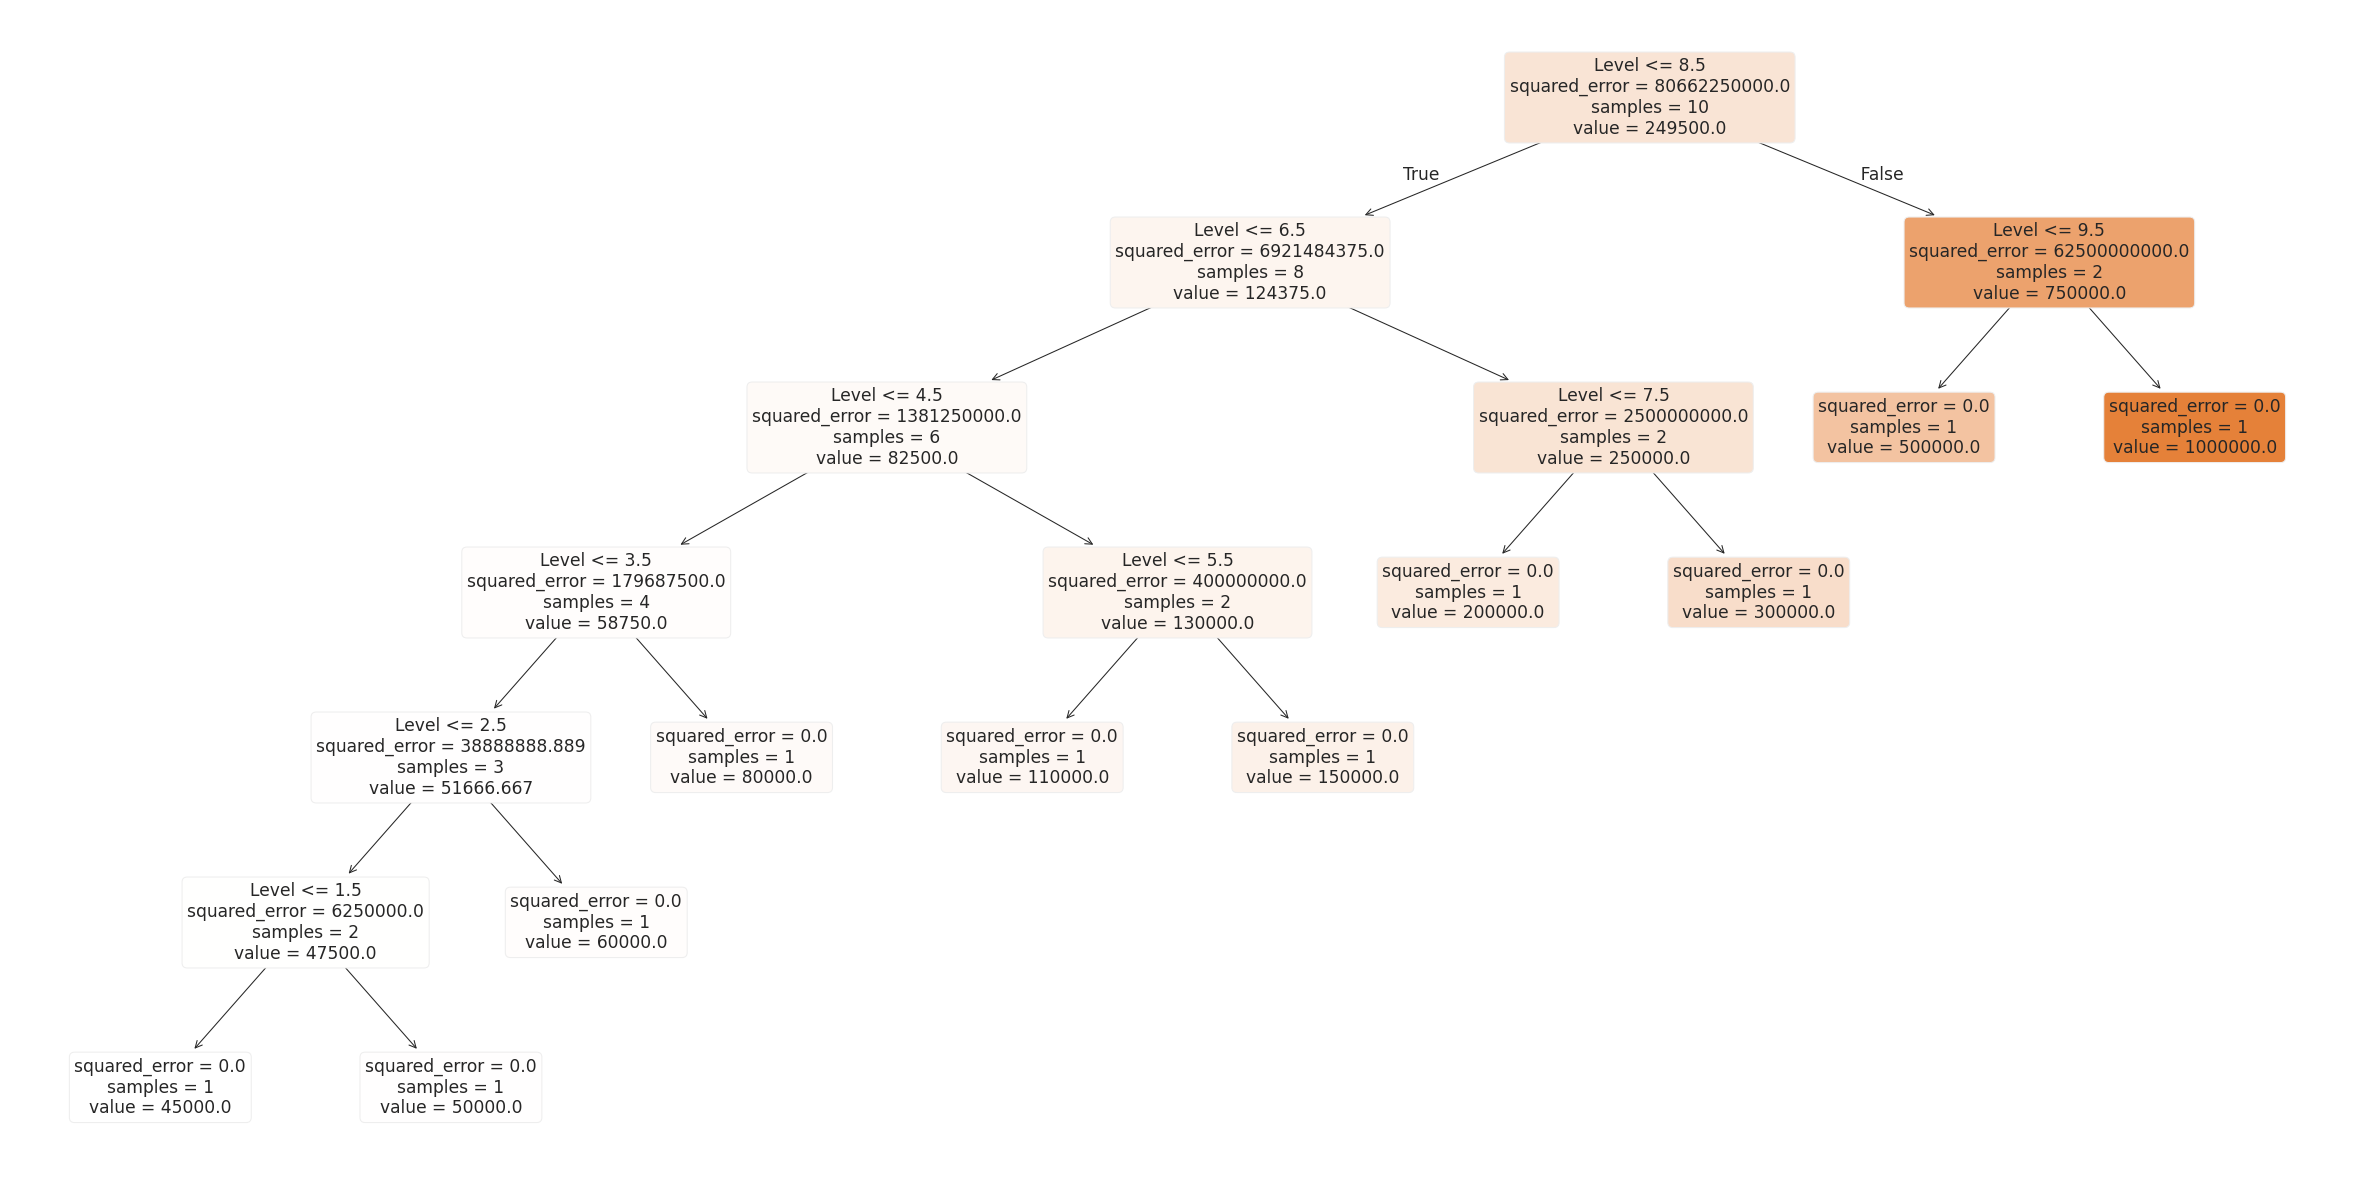

In [10]:
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(regressor, filled=True, rounded=True, feature_names=["Level"])
plt.show()

#### Example 2 - Decision Trees

In [13]:
df = pd.read_csv("data/penguins.csv")

In [14]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [16]:
# drop Unnamed: 0 and year
df.drop(columns=["Unnamed: 0", "year"], inplace=True)

In [22]:
100 * df.isna().sum() / len(df)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [26]:
df.dropna(inplace=True)

In [27]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [28]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [32]:
import seaborn as sns

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

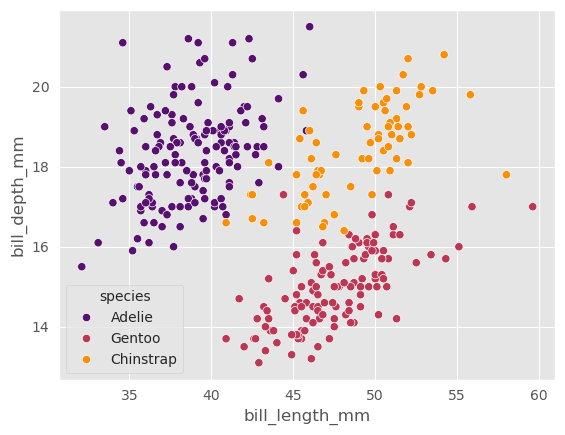

In [41]:
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", palette="inferno")

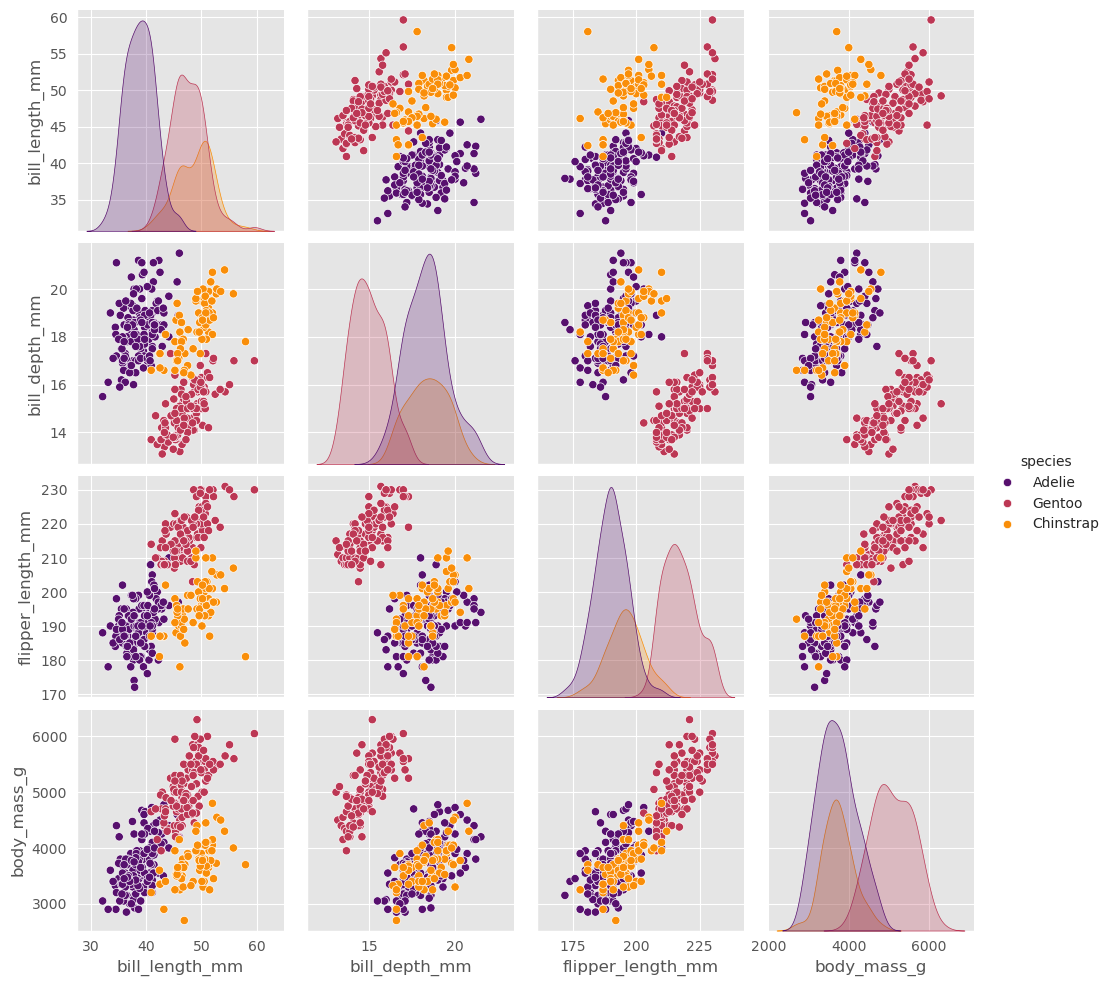

In [42]:
sns.pairplot(df, hue="species", palette="inferno")

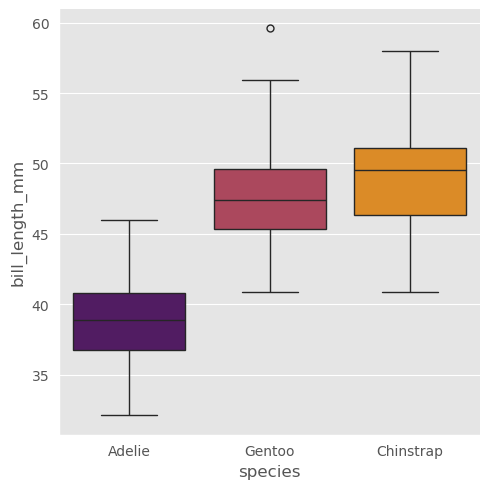

In [56]:
sns.catplot(data=df, x="species", y="bill_length_mm", kind="box", hue="species", palette="inferno")

In [44]:
pd.get_dummies(df)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,False,True,False,False,True,False,False,True


In [45]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,True,False,True
340,43.5,18.1,202.0,3400.0,True,False,False
341,49.6,18.2,193.0,3775.0,True,False,True
342,50.8,19.0,210.0,4100.0,True,False,True


In [46]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
base_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [55]:
confusion_matrix(y_test,base_pred)

array([[38,  2,  0],
       [ 0, 19,  0],
       [ 0,  0, 41]])

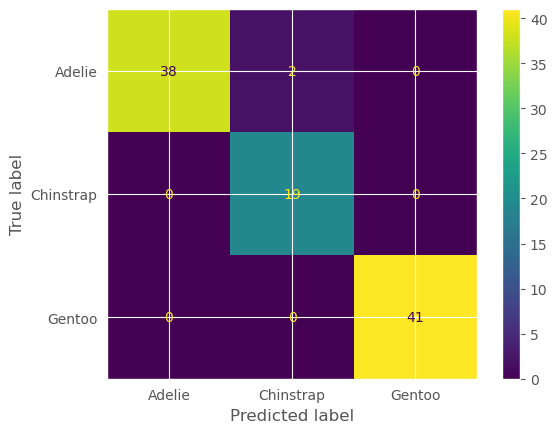

In [59]:
ConfusionMatrixDisplay(confusion_matrix(y_test,base_pred),display_labels=model.classes_).plot()

In [61]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        40
   Chinstrap       0.90      1.00      0.95        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.97       100
weighted avg       0.98      0.98      0.98       100



In [62]:
model.feature_importances_

array([0.36430191, 0.054714  , 0.510939  , 0.        , 0.05078698,
       0.        , 0.01925811])

In [63]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=["Importance"]).sort_values(by="Importance",ascending=False)

,Importance
flipper_length_mm,0.510939
bill_length_mm,0.364302
bill_depth_mm,0.054714
island_Dream,0.050787
sex_male,0.019258
body_mass_g,0.000000
island_Torgersen,0.000000


<Axes: xlabel='species', ylabel='body_mass_g'>

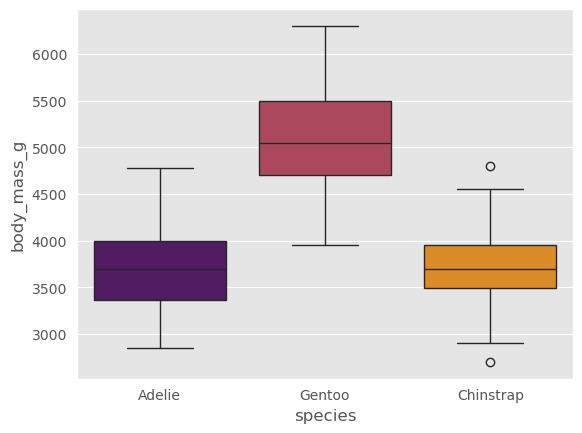

In [64]:
sns.boxplot(x='species',y='body_mass_g',data=df, hue='species', palette='inferno')

In [65]:
from sklearn.tree import plot_tree

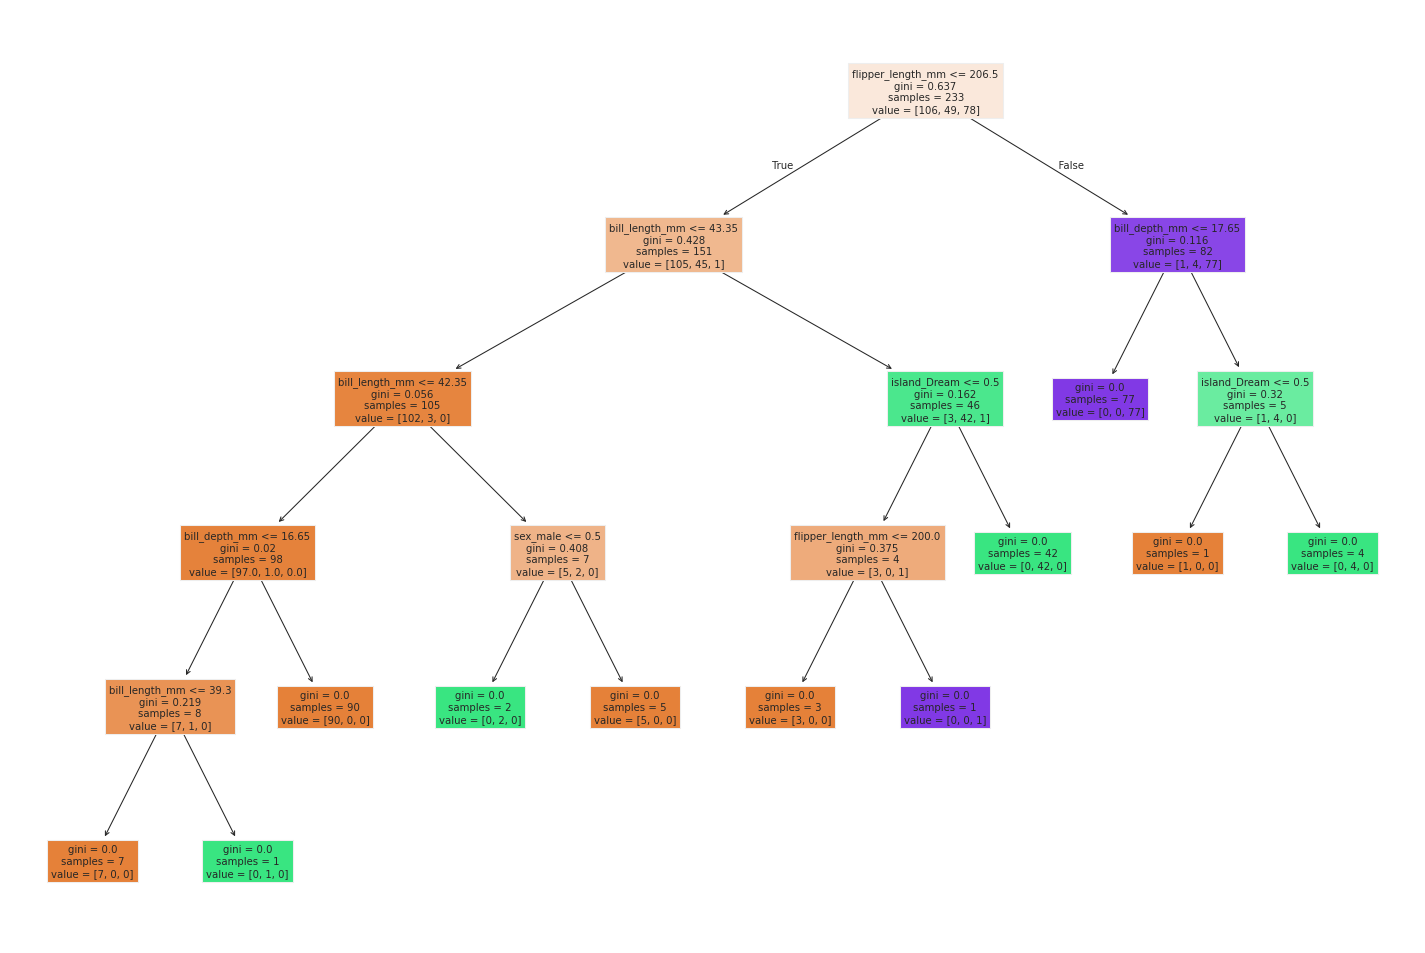

In [72]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [73]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [74]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.89      0.89      0.89        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100





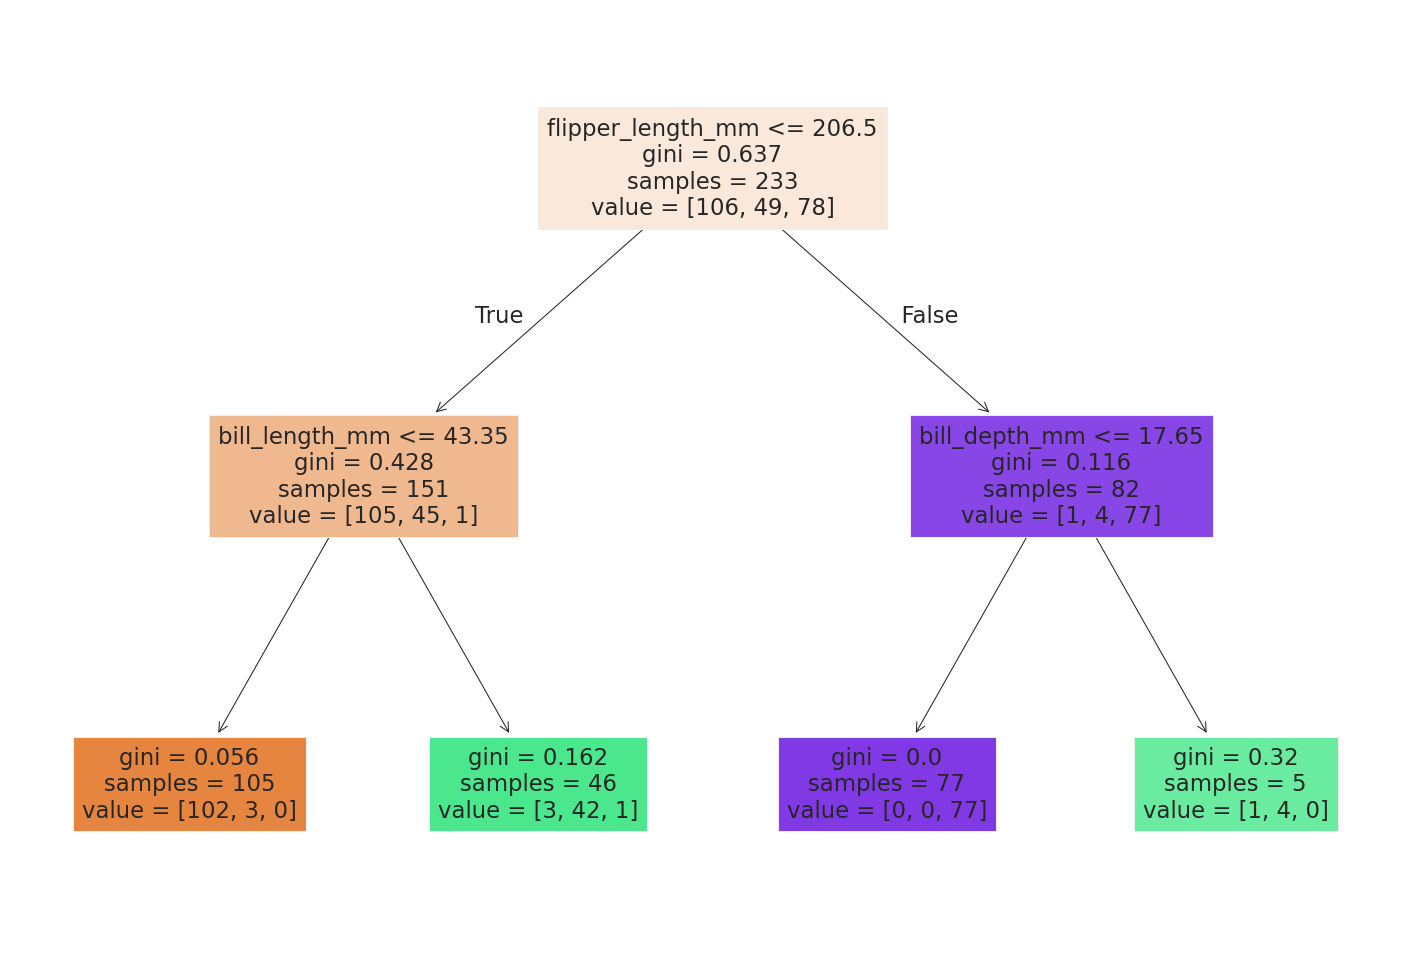

In [75]:
report_model(pruned_tree)

In [76]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.94      0.84      0.89        19
      Gentoo       0.95      1.00      0.98        41

    accuracy                           0.95       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100





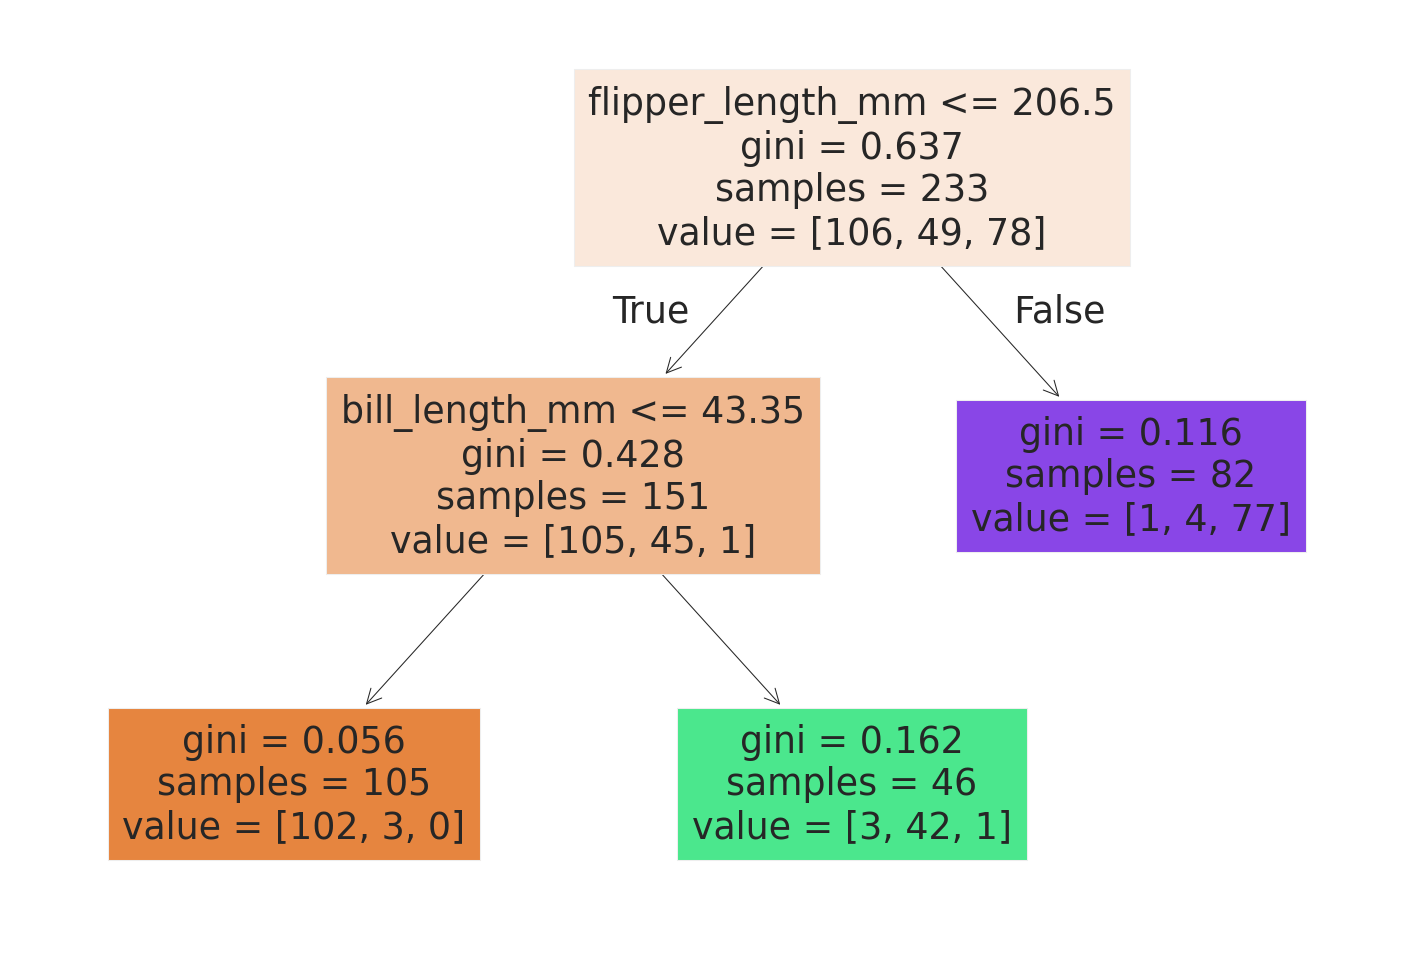

In [77]:
report_model(pruned_tree)

In [78]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.96        40
   Chinstrap       0.86      1.00      0.93        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.97       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.97      0.97      0.97       100





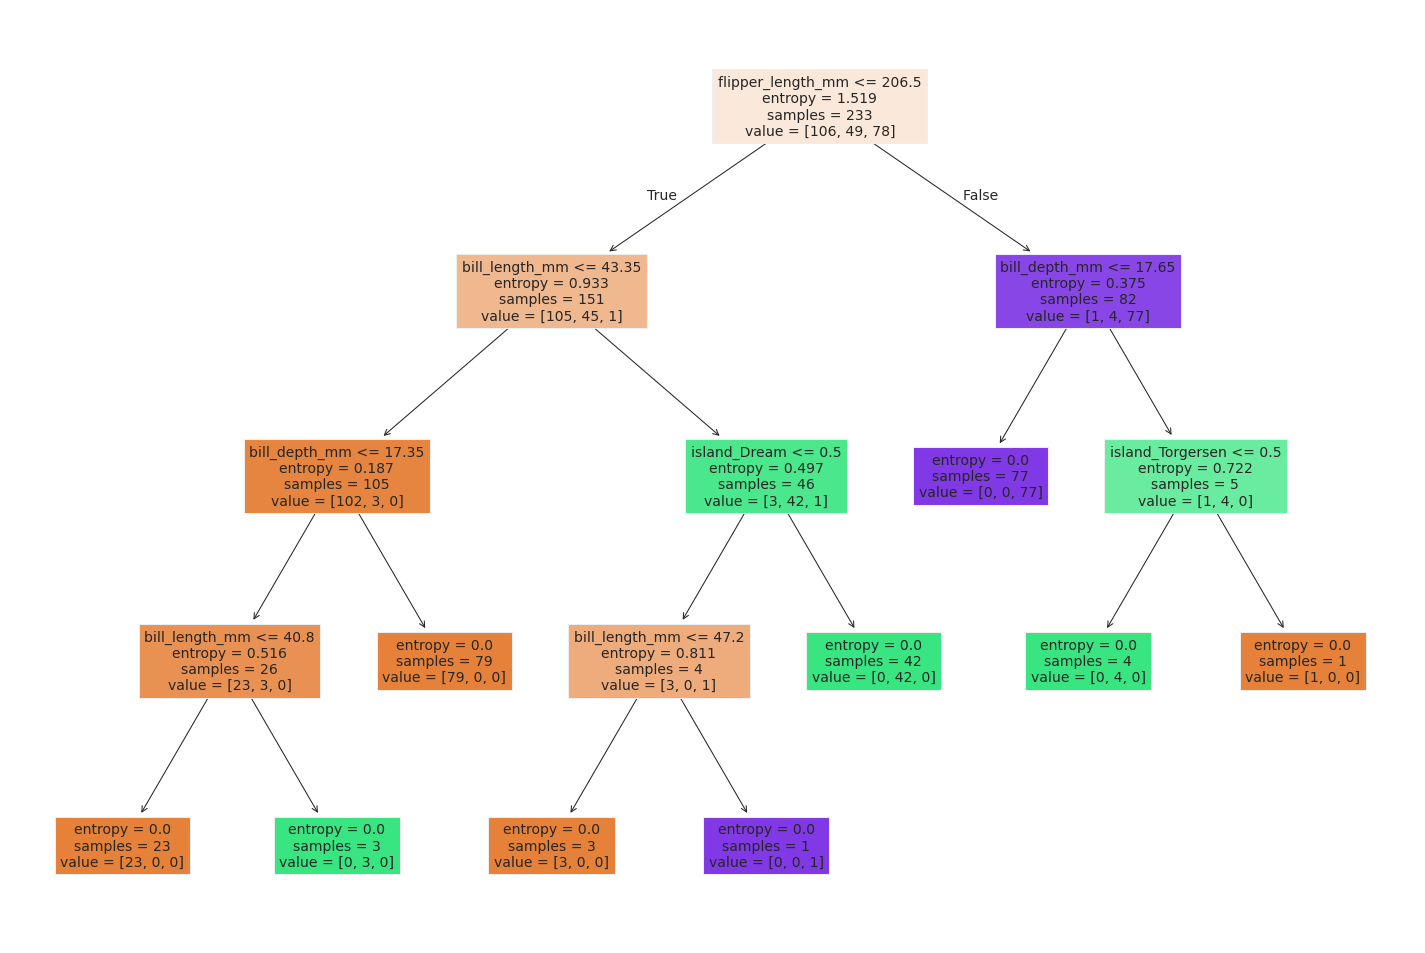

In [79]:
report_model(entropy_tree)